<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">PENGANTAR DATA SCIENCE</div>
<div>Eksplorasi Dataset Banking</div>
<hr>
<div>6182001004 | William Surya W - 6182001005 | Kae Zarren L H - 6182001042 | Ester Oka N</div>

In [314]:

#import library
import pandas as pd;
import numpy as np;

import matplotlib.pyplot as plt;

from sklearn.feature_selection import *;
from sklearn.model_selection import *; 

from sklearn.ensemble import RandomForestRegressor;
from sklearn.linear_model import LinearRegression;

from sklearn import metrics;
from sklearn.metrics import *;

import seaborn as sns;


In [315]:
#load dataset
url = 'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/forestfire-dt/forestfires.csv';

forest = pd.read_csv(url, sep=",", encoding='cp1252');

In [316]:
#knowing the data
print('Forest dataset dimention : ', forest.shape,'\n\nForest dataset attribute : ', forest.columns, '\n\nForest dataset info : ', forest.info);

Forest dataset dimention :  (517, 13) 

Forest dataset attribute :  Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object') 

Forest dataset info :  <bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7

In [317]:
#checking data - NaN value
dfCheck = forest[forest.isna().any(axis=1)];
print("Data with NaN values :"); print(dfCheck);

Data with NaN values :
Empty DataFrame
Columns: [X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area]
Index: []


In [318]:
#cheking data - Minimum value
print("Minimum values :"); print(forest.min());

Minimum values :
X           1
Y           2
month     apr
day       fri
FFMC     18.7
DMC       1.1
DC        7.9
ISI       0.0
temp      2.2
RH         15
wind      0.4
rain      0.0
area      0.0
dtype: object


In [319]:
#checking data - Maximum value
print("Maximum values :"); print(forest.max());

Maximum values :
X              9
Y              9
month        sep
day          wed
FFMC        96.2
DMC        291.3
DC         860.6
ISI         56.1
temp        33.3
RH           100
wind         9.4
rain         6.4
area     1090.84
dtype: object


In [320]:
#data preparation

# removing data with 0 burnt forest area
# forest = forest[(forest[['area']] != 0).all(axis=1)];

# month classification --------
month_clases = ['1','2','3','4','5','6','7','8','9','10','11','12'];

month_items = [
    (forest['month'] == "jan"),
    (forest['month'] == "feb"),
    (forest['month'] == "mar"),
    (forest['month'] == "apr"),
    (forest['month'] == "may"),
    (forest['month'] == "jun"),
    (forest['month'] == "jul"),
    (forest['month'] == "aug"),
    (forest['month'] == "sep"),
    (forest['month'] == "oct"),
    (forest['month'] == "nov"),
    (forest['month'] == "dec")
];

forest['M'] = np.select(month_items, month_clases);
forest['M'] = forest['M'].astype('int64');

# day classification --------
day_clases = ['1','2','3','4','5','6','7'];

day_items = [
    (forest['day'] == "mon"),
    (forest['day'] == "tue"),
    (forest['day'] == "wed"),
    (forest['day'] == "thu"),
    (forest['day'] == "fri"),
    (forest['day'] == "sat"),
    (forest['day'] == "sun")
];

forest['D'] = np.select(day_items, day_clases);
forest['D'] = forest['D'].astype('int64');


In [321]:
# features - labels preparation
forest = forest[(forest[['area']] != 0).all(axis=1)];
forest = forest[['X','Y','M','D','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']];

forest_features = forest[['M','FFMC','DMC','DC','ISI','temp']];
forest_features_np = np.array(forest_features.values);

forest_target = forest[['area']];
forest_target_np = np.array(forest_target.values);
forest_target_np = forest_target_np.ravel();

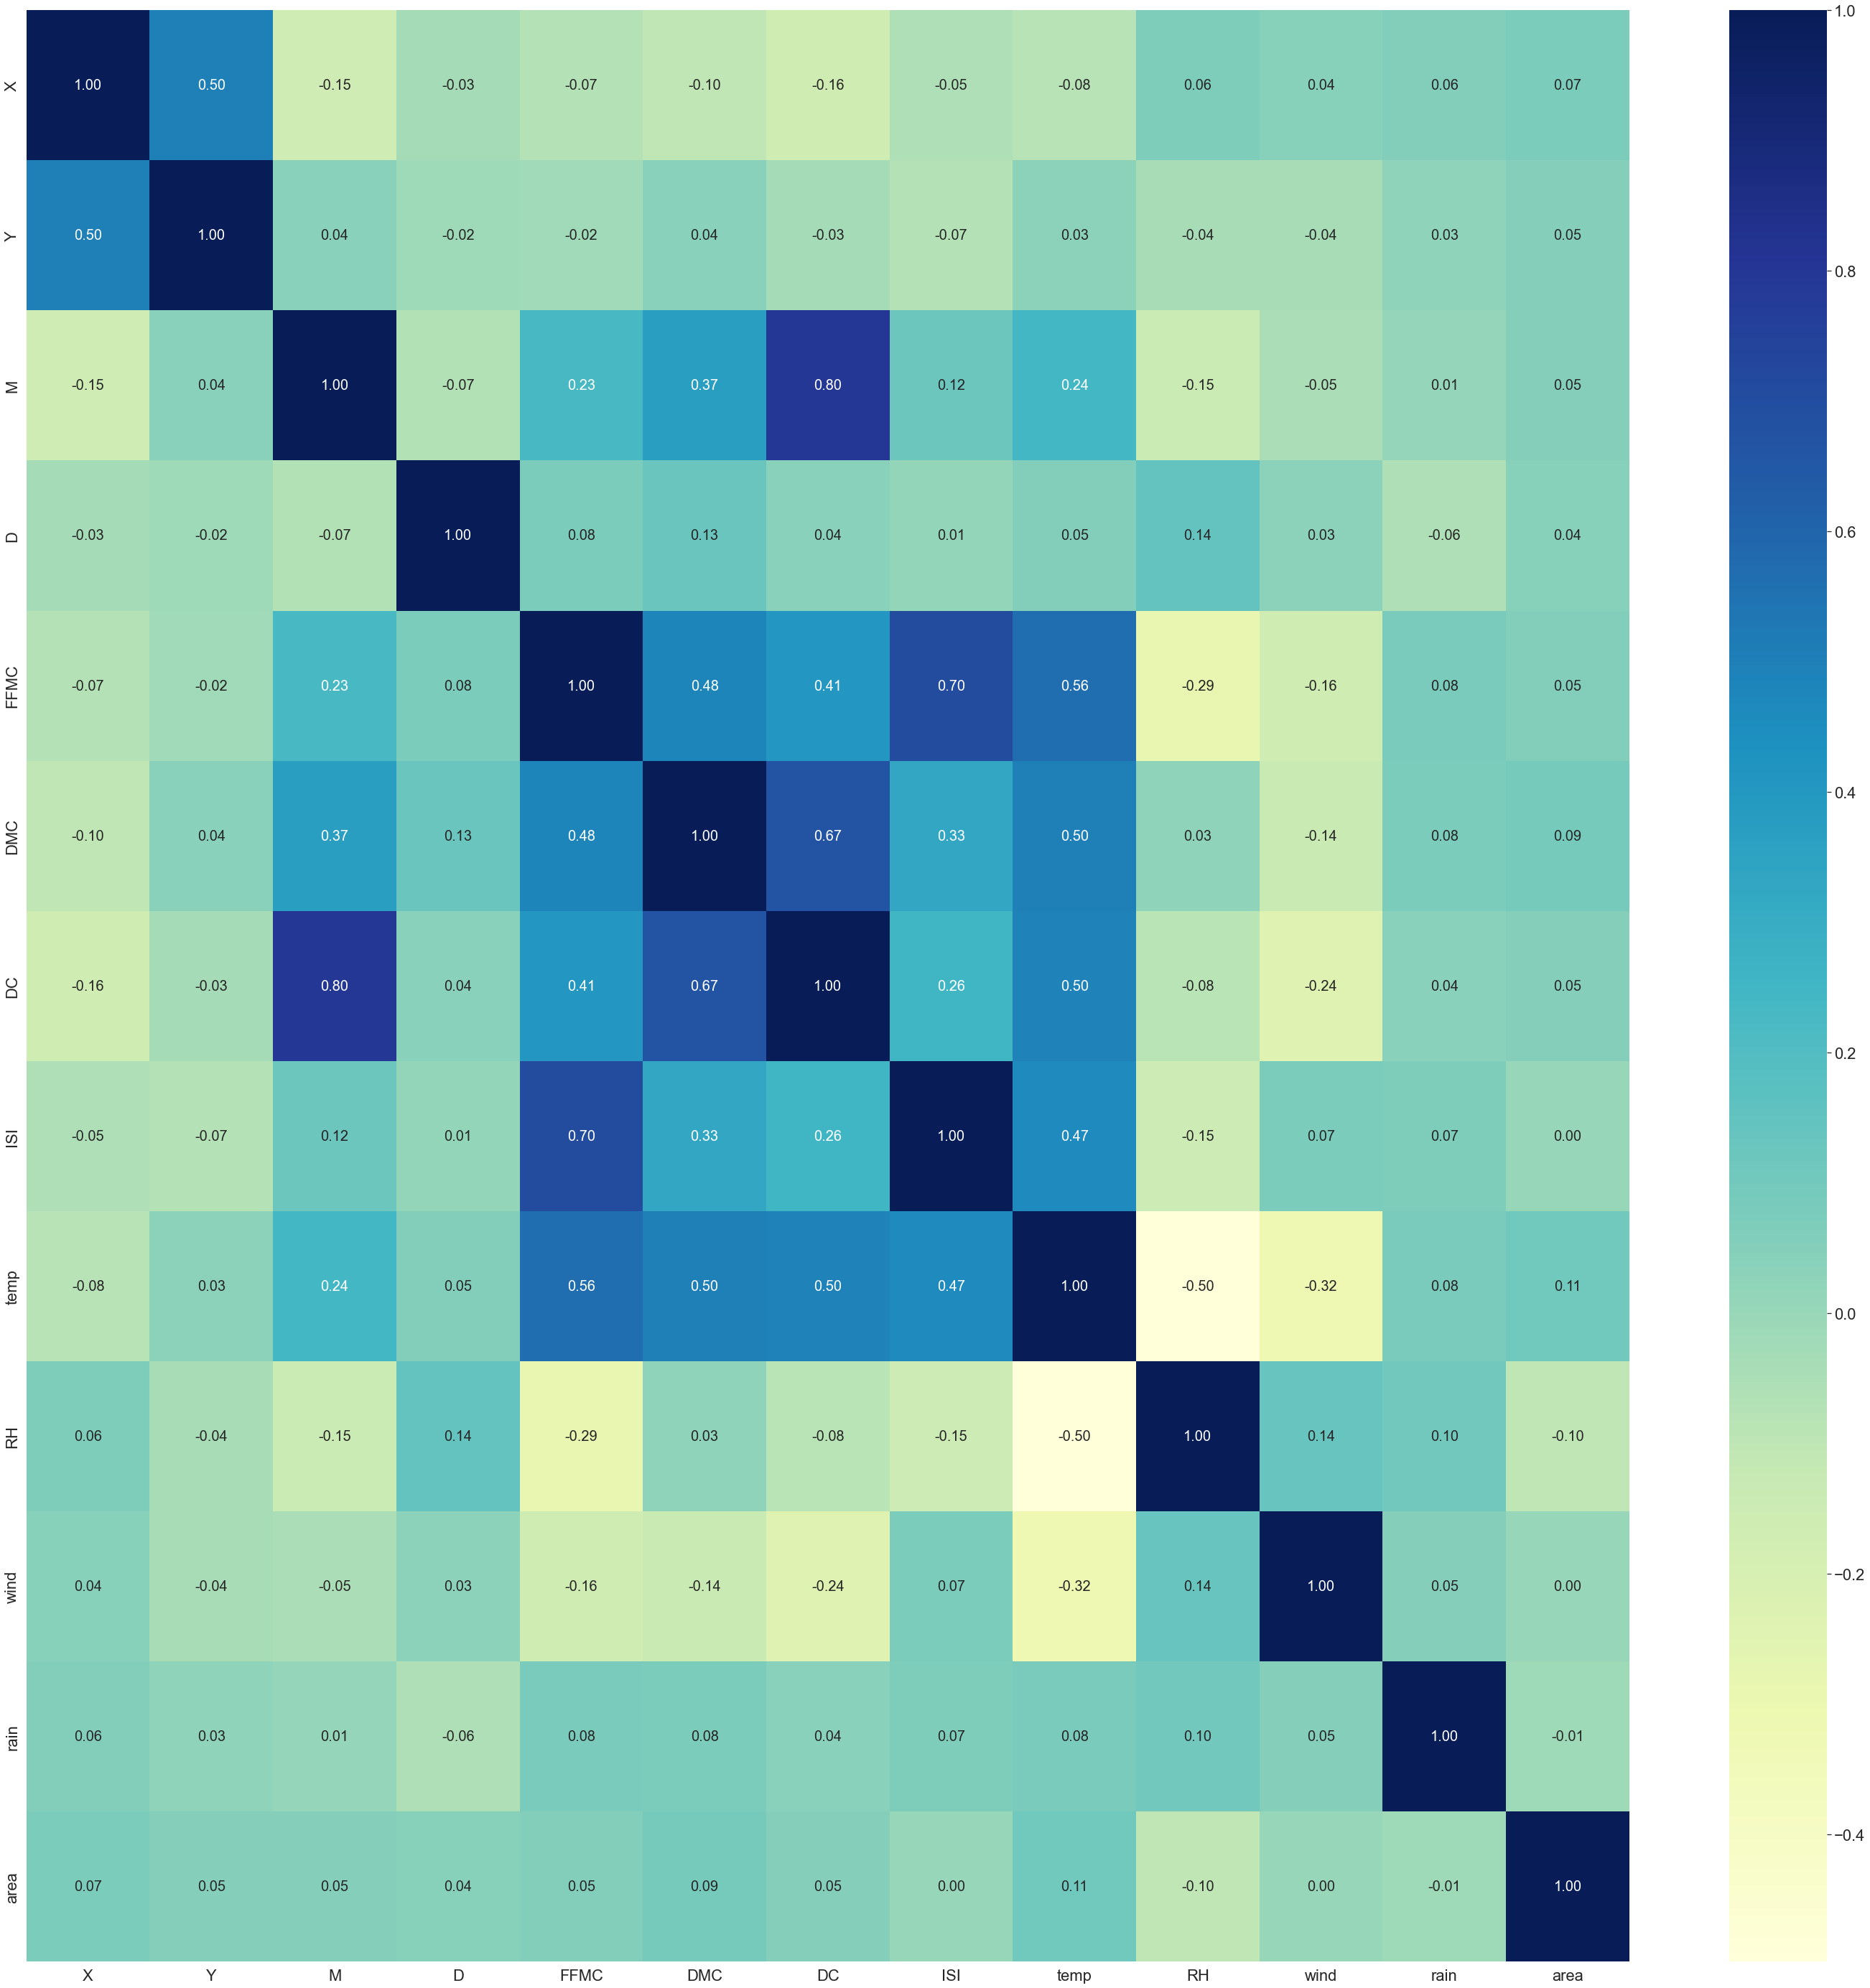

In [322]:
# metode selection (1) : heat-map
corr = forest.corr();

sns.set(rc = {'figure.figsize':(50,50)}, font_scale=2);
sns.heatmap(corr, cmap="YlGnBu", annot = True, linewidths=0, annot_kws={"size": 20}, fmt='.2f');

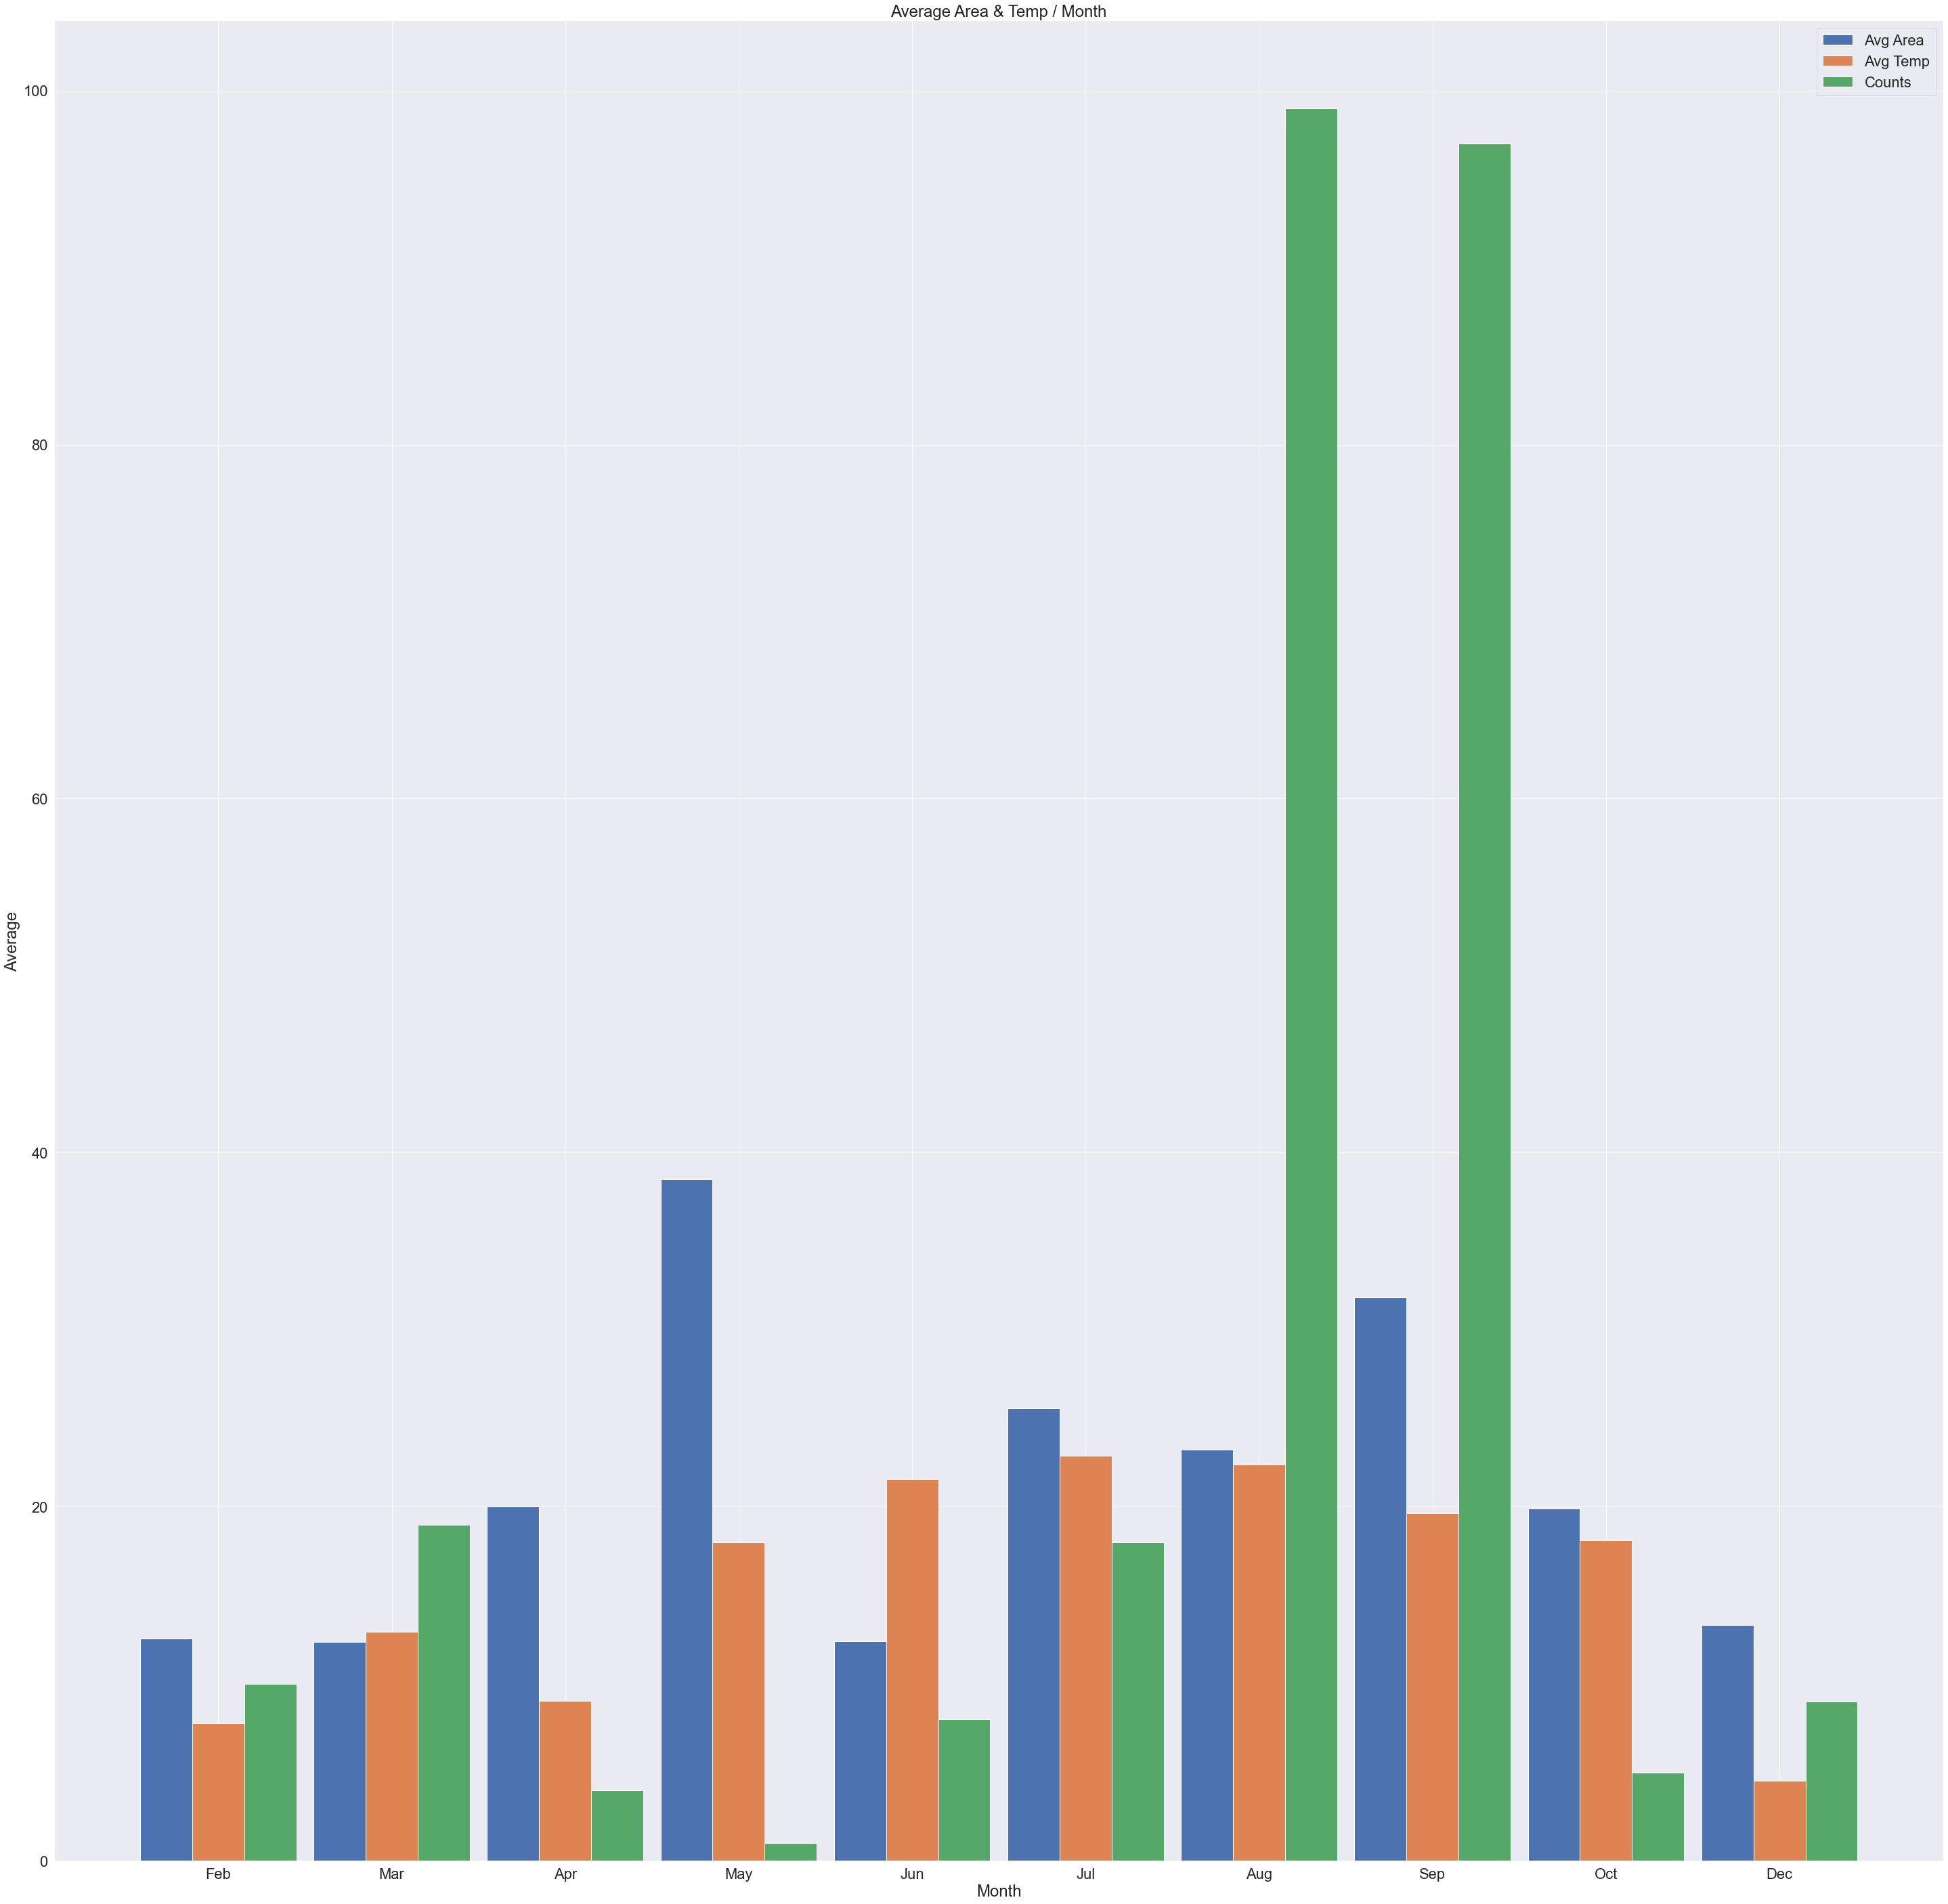

In [323]:
# data corelation
x = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec'];
x_len = np.arange(len(x));

# a = rata rata luas area yang terbakar per bulan
a = forest.groupby('M')['area'].mean()

# b = rata rata tingkat temperature per bulan
b = forest.groupby('M')['temp'].mean()

# c = total banyaknya kebarakaran hutan per bulan
c = forest.groupby('M')['M'].value_counts()

plt.bar(x_len-0.3, a, 0.3, label="Avg Area");
plt.bar(x_len, b, 0.3, label="Avg Temp");
plt.bar(x_len+0.3, c, 0.3, label="Counts");

plt.xticks(x_len, x)
plt.xlabel("Month")
plt.ylabel("Average")
plt.title("Average Area & Temp / Month")
plt.legend()
plt.show()

In [324]:
x_train, x_test, y_train, y_test = train_test_split(forest_features_np, forest_target_np, test_size=0.30, random_state=0);

# non linear regression - RFR
model_RFR = RandomForestRegressor()

crossvalidation = KFold(n_splits=5, random_state=4, shuffle=True)

scores = cross_val_score(model_RFR, x_train, y_train, scoring="neg_mean_absolute_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg MAE: " + str(np.mean(scores)))

scores = cross_val_score(model_RFR, x_train, y_train, scoring="neg_mean_squared_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg MSE: " + str(np.mean(scores)))

scores = cross_val_score(model_RFR, x_train, y_train, scoring="neg_root_mean_squared_error", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg RMSE: " + str(np.mean(scores)))

scores = cross_val_score(model_RFR, x_train, y_train, scoring="r2", cv=crossvalidation,  n_jobs=1)
print(scores)
print("Avg R2: " + str(np.mean(scores)))

[-38.99237086 -29.33834652 -42.46826597 -56.46193184 -21.51763449]
Avg MAE: -37.75570993842714
[ -3967.27466248  -2823.44543519 -15970.28898929 -34470.92654171
  -2134.9343244 ]
Avg MSE: -11873.37399061448
[ -61.57803268  -54.75498617 -127.29581439 -184.02968174  -45.95654501]
Avg RMSE: -94.72301199705187
[-1.98893351 -0.25868654 -0.08048703 -0.09298891 -0.57202738]
Avg R2: -0.5986246745915544


In [325]:
# linear regression
model_regres = LinearRegression();
model_regres.fit(x_train, y_train);

print('y = ', model_regres.intercept_,' * x + ',model_regres.coef_)

y_pred = model_regres.predict(x_test)
print('Mean Absolute Error (MAE) : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r_2 = r2_score(y_test, y_pred)
print('R^2 : ', r_2)

y =  -85.96304430497575  * x +  [ 6.39072774  0.61467865  0.18106736 -0.08317658 -1.91302087  2.66590169]
Mean Absolute Error (MAE) :  24.814267010058174
Mean Squared Error (MSE) :  1094.424078060935
Root Mean Squared Error (RMSE) :  33.08208092095984
R^2 :  -0.17067602497638235
